# AS 4OYD


## Question: Can we fold 4OYD with and without binder to be itself?

In this scenario, we use __4OYD__ as template, as the source of our motif and binder and as the final target conformation we are aiming to mimic.

We will run the protocol with and without a binder. Using full CA constraints from the template.

### Nomenclature:

* __Template:__ Structure that will accomodate the query motif.  
* __Design:__ Chain that we are designing; contains the query motif and is guided by the template info.  
* __Binder:__ If any, is whatever protein(s) bind to the query motif.  
* __Target:__ Protein that we expect our design to resemble to and to which we compare.  


In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import rstoolbox
import pandas as pd
import seaborn as sns
import copy

sns.set(font_scale=1.5)

In [16]:
experiments = [
    "nobinder/as4oyd_nobinder_1_minisilent",
    "binder/as4oyd_binder_1_minisilent"
]

definition = {
    "nobinder": {
        "scores":{
            "description": "description", "score": "score",
            "GRMSD2Target": "GRMSD2Target",
            "LRMSD2Target": "LRMSD2Target", "LRMSDH2Target": "LRMSDH2Target", "LRMSDLH2Target": "LRMSDLH2Target"
        },
        "naming": ["", "", "experiment", "", "cluster", "decoy"]
    },
    "binder": {
        "scores":{
            "description": "description", "design_score": "score",
            "GRMSD2Target": "GRMSD2Target",
            "LRMSD2Target": "LRMSD2Target", "LRMSDH2Target": "LRMSDH2Target", "LRMSDLH2Target": "LRMSDLH2Target"
        },
        "naming": ["", "", "experiment", "", "cluster", "decoy"]
    }
}

In [17]:
dataframes = []
for experiment in experiments:
    dlist = rstoolbox.api.read_rosetta_silent(experiment)
    df    = rstoolbox.api.process_from_definitions(dlist, definition[experiment.split("/")[0]])
    dataframes.append( df )
data = pd.concat(dataframes)

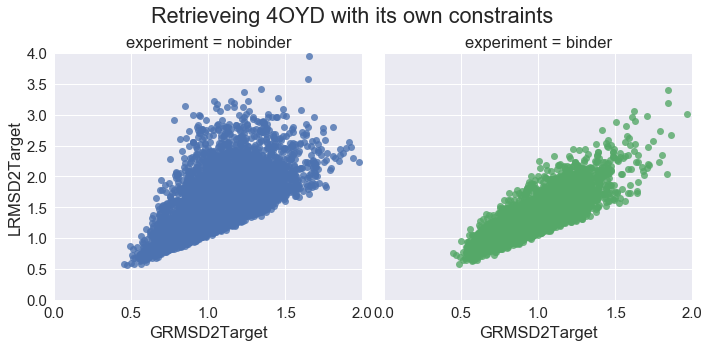

In [18]:
g = sns.lmplot(x="GRMSD2Target", y="LRMSD2Target", col="experiment", hue="experiment", data=data, fit_reg=False)
plt.subplots_adjust(top=0.85)
g.axes[0,0].set_ylim(0,4)
g.axes[0,0].set_xlim(0,2)
g.fig.suptitle('Retrieveing 4OYD with its own constraints')
sns.plt.show()

In [21]:
ddg_experiments = [
    "nobinder/ddg_evaluation.score",
    "binder/ddg_evaluation.score"
]

ddg_definition = {
    "scores":{
        "description": "description", "ddg": "ddg", "post_ddg": "min_ddg"
    },
    "naming": ["", "", "experiment", "", "cluster", "decoy", ""]
}

In [26]:
dataframes = []
for experiment in ddg_experiments:
    dlist = rstoolbox.api.read_rosetta_silent(experiment)
    df    = rstoolbox.api.process_from_definitions(dlist, ddg_definition)
    dataframes.append( df )
ddgdata  = pd.concat(dataframes)
ddgdata  = ddgdata.drop("description", axis=1)
fulldata = pd.merge(data, ddgdata, how='left', on=['cluster', 'decoy', 'experiment'])

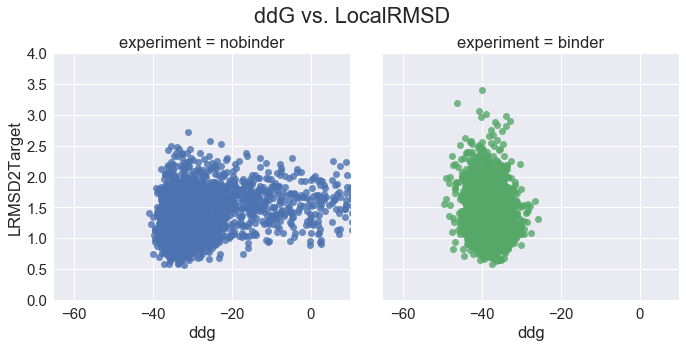

In [36]:
g = sns.lmplot(x="ddg", y="LRMSD2Target", col="experiment", hue="experiment", data=fulldata, fit_reg=False)
plt.subplots_adjust(top=0.85)
g.axes[0,0].set_ylim(0,4)
g.axes[0,0].set_xlim(-65,10)
g.fig.suptitle('ddG vs. LocalRMSD')
sns.plt.show()

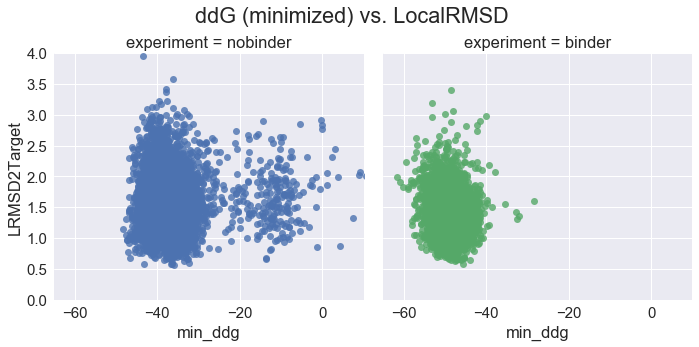

In [35]:
g = sns.lmplot(x="min_ddg", y="LRMSD2Target", col="experiment", hue="experiment", data=fulldata, fit_reg=False)
plt.subplots_adjust(top=0.85)
g.axes[0,0].set_ylim(0,4)
g.axes[0,0].set_xlim(-65,10)
g.fig.suptitle('ddG (minimized) vs. LocalRMSD')
sns.plt.show()